<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [3]:
np.random.rand()
np.random.rand(10)        
np.random.rand(5,2)

array([[0.69069415, 0.65316895],
       [0.43538077, 0.86468948],
       [0.14618011, 0.1654172 ],
       [0.58240619, 0.14864193],
       [0.55466409, 0.26366768]])

In [5]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.58

### 1.2 Visualising the random numbers

In [7]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

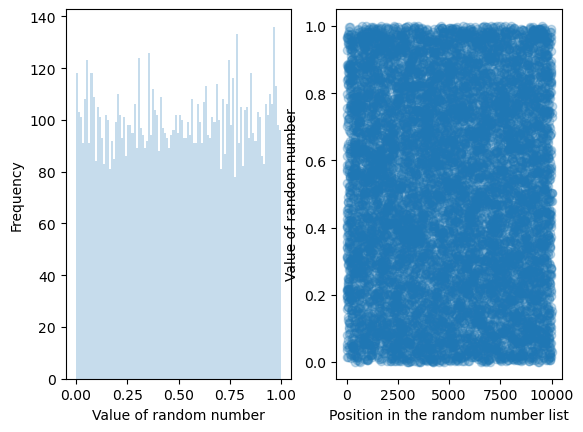

In [8]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

Text(0, 0.5, 'Value of random number')

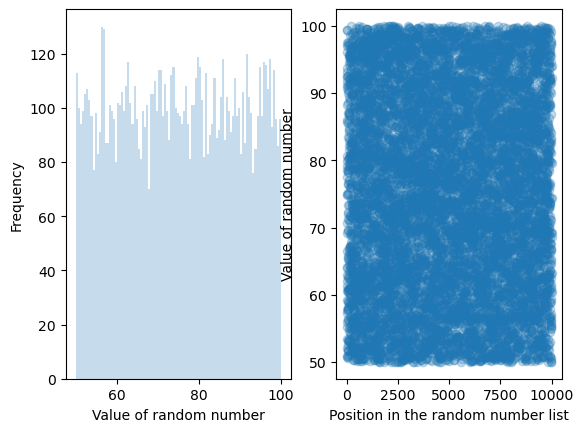

In [10]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)
fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

In [15]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([50, 76, 37, 34, 38, 67, 11,  0, 75, 80])

In [13]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

### 1.3 68%?

In [ ]:

# Your code here


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:

# Your code here


### 1.2 The simulation

In [ ]:

# Your code here


### 1.3 What does theory say?

In [ ]:

# Your code here


## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [ ]:

# Your code here


### 2.3 A better solution

In [ ]:

# Your code here


### 2.4 A smarter solution

In [ ]:

# Your code here


## Exercise 1 :  Vital Stats of Random π

In [ ]:



# Your solution here


